### Агафонов Артём

# Градиентный спуск

## Теория

### 1
Говорят, что функция принадлежит классу $f \in C^{k,p}_L (Q)$, если она $k$ раз непрерывно дифференцируема на $Q$, а $p$-ая производная имеет константу Липшица $L$. 

$$
\|\nabla^p f(x) - \nabla^p f(y)\| \leq L \|x-y\|, \qquad \forall x,y \in Q
$$

Чаще всего используются $C_L^{1,1}, C_L^{2,2}$ на $\mathbb{R}^n$. 
Заметим, что:
* $p \leq k$
* Если $q \geq k$, то $C_L^{q,p} \subseteq C_L^{k,p}$. Чем выше порядок производной, тем сильнее ограничение (меньшее количество функций принадлежат классу)

Докажите, что функция принадлежит к классу $C_L^{2,1} \subseteq C_L^{1,1}$ тогда и только тогда, когда $\forall x \in \mathbb{R}^n$:
$$
\|\nabla^2 f(x)\| \leq L
$$

Докажите так же, что последнее условие можно без ограничения общности переписать в виде:

$$
-L I_n \preceq \nabla^2 f(x) \preceq L I_n
$$

Примечание: по умолчанию для векторов используется Евклидова норма, а для матриц - спектральная

а) По формуле Ньютона-Лейбница: 
$$\int_y^x \nabla^2 f(z)dz = \nabla f(x) - \nabla f(y). $$
Параметризация:
$$\int_0^1 \nabla^2 f(x+\tau(y-x))d(x+\tau(y-x)) = \int_0^1\nabla^2 f(x+\tau(y-x))d\tau (y-x) = \nabla f(x)-\nabla f(y).$$
1. $\Leftarrow:$ $\|\nabla^2f(x)\| \leqslant L \Rightarrow \|\nabla f(x) - \nabla f(y)\| = \| \int_0^1 \nabla^2 f(x+\tau(y-x) d\tau (y-x)\| \leqslant \| \int_0^1 \nabla^2 f(x+\tau(y-x))d\tau\| \|y-x\| \leqslant \\ \leqslant \int_0^1 \| \nabla^2 f(x+\tau(y-x))\|\|d\tau\|\|y-x\| \leqslant L\|y-x\|.$
2. $\Rightarrow:$ Рассмотрим $\alpha > 0$ и произвольный $z \in \mathbb{R}^n:$ $$\|\int_0^1 \nabla^2 f(x+\tau\alpha z)d\tau \alpha z\| = \|\int_0^\alpha f(x+\tau z)d\tau z\| = \|\nabla f(x+\alpha z) - f(x)\| \leqslant \alpha L\|z\|.$$ Разделим на $\alpha \|z\|$  и получим требуемое.





б) Заметим, что спектральная норма матрицы равна самому большому её собственному значению $\Rightarrow $$$ |\lambda_i |\leqslant L \Rightarrow -\nabla^2 f(x) - LI_n \preccurlyeq 0 \preccurlyeq LI_n - \nabla^2 f(x) \Rightarrow - LI_n \preccurlyeq \nabla^2 f(x) \preccurlyeq LI_n.$$



### 2
Покажите, что с помощью следующих стратегий подбора шага:
* Постоянный шаг $h_k = \dfrac{1}{L}$
* Убывающая последовательность $h_k = \dfrac{\alpha_k}{L}, \quad \alpha_k \to 0$
* Последовательность, удовлетворяющая на каждом шаге правилам Армихо

можно получить оценку убывания функции на итерации вида:

$$
f(x_k) - f(x_{k+1}) \geq \dfrac{\omega}{L}\|\nabla f(x_k)\|^2
$$
$\omega > 0$ - некоторая константа

* По определению градиентного спуска получим: $$f(x_k) - f(x_{k+1}) \geqslant \frac{1}{2L}\|\nabla f(x)\|^2.$$
* $f(x_k) - f(x_{k+1}) \geqslant h_k(1 - \frac 12Lh_k)\|\nabla f(x_k)\|^2 \geqslant \frac{\alpha_k}{L}(1-\frac{\alpha_k}{2})\|\nabla f(x_k)\|^2$ ???????????????
* По правилу Армихо: $f(x_k) - f(x_{k+1}) \leqslant \beta \langle \nabla f(x_k),x_k - x_{k+1}\rangle = \beta h_k \|\nabla f(x_k)\|^2 \Rightarrow \beta \geqslant (1 - \frac 12Lh_k) \Rightarrow h_k \geqslant \frac 2L(1-\beta)$. Также по правилу Армихо $f(x_k) - f(x_{k+1}) \geqslant \alpha \langle \nabla f(x_k),x_k-x_{k+1}\rangle = \alpha h_k\|\nabla f(x_k)\|^2$.
Итого получаем: $$f(x_k) - f(x_{k+1}) \geqslant \alpha \frac 2L(1-\beta) \|\nabla f(x_k)\|^2.$$

## Практика

### Енот
Будем рассматривать изображение, как скалярную функцию от двух переменных (координаты $x$ и $y$):
$$
f(x,y): \mathbb{R}^d \to \mathbb{R} \;\;\;\;\;\; (d = n \times n)
$$

Мы нарисуем енотика, который есть у всех. Вы можете загрузить Ваше любимое изображение с помощью функции [`imread`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.misc.imread.html). Люди, выполнившие задание полностью смогут принять участие в конкурсе самых мемных картинок по мнению преподавателя.

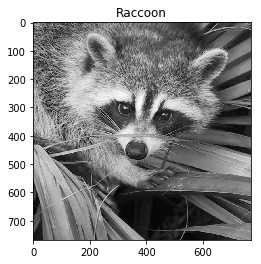

In [177]:
# Libraries
%matplotlib inline
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np

# Uploading and normalizing the image of raccoon
enot = (misc.face(gray = True)/255)[:, -768:]

# Plotting
plt.imshow(enot, cmap='gray')
# plt.axis('off')
plt.title('Raccoon')
plt.show()

Пошумим? Добавим двухмерный гауссов шум с нулевым средним и задаваемой дисперсией
$$
y = enot(x,y) + \mathcal{N}(0, \sigma)
$$

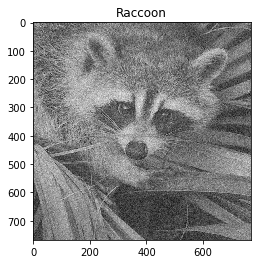

In [178]:
# Enot's size
n = enot.shape[1]

# Add some noise
sigma = 0.1
y = (enot + sigma*np.random.randn(n,n))

# Plotting
plt.imshow(y, cmap='gray')
# plt.axis('off')
plt.title('Raccoon')
plt.show()

Задача заключается в том, как, имея только шумное изображение $y$, получить максимально близкое к исходному (как минимум, менее шумное). Наша задача будет формулироваться следующим образом: 

$$
\min_{x \in R^d} f(x) = \frac{1}{2} \|y-x\|^2 + \lambda J(x),
$$

где $J(x)$ - некоторая функция, которая характеризует шумность (зернистость) картинки. То есть, решая задачу оптимизации мы должны получить с одной стороны изображение, близкое к $y$, с другой стороны, как можно менее шумное. Остается один важный вопрос - *что из себя представляет функция $J(x)$?*

#### Подход бедных студентов
В каждой точке изображения можно посчитать производную по двум координтам. Таким образом, если изображение это функция $enot(x, y): \mathbb{R}^d \to \mathbb{R}$, то её градиент - это функция $\nabla enot(x,y): \mathbb{R}^d \to \mathbb{R}^2$, представляющая в каждой точке вектор из двух компонент $\left( \dfrac{\partial \;enot}{\partial x}, \dfrac{\partial \;enot}{\partial y} \right)$. Полный набор по все точкам - тензор размера $n \times n \times 2$

Величина градиента в каждой точке может быть оценена как

$$
g(x_i, y_i) = \sqrt{\left(\dfrac{\partial \;enot}{\partial x} (x_i, y_i)\right)^2 + \left(\dfrac{\partial \;enot}{\partial y} (x_i, y_i)\right)^2}
$$

Тогда будем строить $J(x)$ следующим образом:
$$
J(x) = \sum\limits_{x_i,y_i} \left[g(x_i, y_i)^2 \right]
$$

Тогда он будет характеризовать некоторую кумулятивную величину изменения значения пикселя по всему изображению. [Метод конечных разностей](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BA%D0%BE%D0%BD%D0%B5%D1%87%D0%BD%D1%8B%D1%85_%D1%80%D0%B0%D0%B7%D0%BD%D0%BE%D1%81%D1%82%D0%B5%D0%B9) поможет оценить величину частной производной. Для решения проблемы с граничными значениями можно, например, считать, что изображение циклично продолжается по сторонам (т.е. следующие столбец/ строка после последнего - это первый).
$$
\nabla enot(x_i, y_i) = \left(enot(x_{i+1}, y_{i}) - enot(x_{i}, y_{i}), enot(x_{i}, y_{i+1}) - enot(x_{i}, y_{i})  \right)
$$

In [179]:
## Ваш код

# Напишите функцию, которая принимает на вход черно-белое изображение nxn пикселей, а возвращает тензор размера nxnx2,
# содержащий частные производные в каждой точке, рассчитанный по методу конечных разностей.
def grad(x):
    n = np.shape(x)
    g = np.ndarray(shape = (n[0], n[1], 2))
    up = np.roll(x, -1, axis = 0)
    right = np.roll(x, -1, axis = 1)
    g[:,:,0] = up - x
    g[:,:,1] = right - x
    return g

# Напишите функцию, которая принимает на вход черно-белое изображение nxn, а возвращает матрицу размера nxn,
# содержащую величину градиента в квадрате в каждой точке.
def grad_magnitutde(x):
    return grad(x)[:,:,0]**2  + grad(x)[:,:,1]**2

# Напишите функцию, которая принимает на вход черно-белое изображение nxn, а возвращает число J(x),
# подсчитанное по формуле выше.
def J(x):
    return np.sum(grad_magnitutde(x))

# Напишите функцию, которая считает функцию потерь. (она возвращает число)
def f(x, y, lambd):
    return .5 * np.linalg.norm(y - x)**2 + lambd * J(x)

In [180]:
print (grad_magnitutde(enot))
print (J(enot))

[[4.87812380e-02 2.21453287e-02 2.09150327e-03 ... 1.55324875e-03
  1.36870434e-03 1.38408304e-03]
 [3.26028451e-02 4.21376394e-02 3.34179162e-02 ... 3.95232603e-03
  2.21453287e-03 5.91311034e-02]
 [2.68358324e-02 2.33910035e-02 1.27489427e-02 ... 3.46020761e-03
  3.39869281e-03 1.55171088e-01]
 ...
 [3.07574010e-05 1.53787005e-05 3.07574010e-05 ... 3.07574010e-05
  1.53787005e-05 2.32679739e-01]
 [0.00000000e+00 0.00000000e+00 1.53787005e-05 ... 3.07574010e-05
  1.53787005e-05 2.25221069e-01]
 [2.17777778e-01 2.40292195e-01 2.88642830e-01 ... 8.15071126e-03
  2.22991157e-03 2.17916186e-01]]
3108.710988081507


Для решения задачи методом градиентого спуска необходимо записать градиент целевой функции:
$$
\nabla f(x) = x-y + \lambda \nabla J(x)
$$
Вам предлагается самостоятельно предложить способ подсчета градиента функции $J(x)$. Заметим, что здесь есть широкий простор для творчества (начиная от аналитического вывода формулы и введения гессиана изображения, заканчивая, опять же, разностными схемами первого порядка). Поощрается Ваша интуиция и любое решение, подкрепленное убедительной мотивацией.

Посчитаем градиент $J(x)$ аналитически. По определению функций $J$ и $g$:
$$J(x) = \sum \limits_{i,n} [x(i+1,j)-x(i,j))^2 + x(i,j)]^2 + [x(i, j+1) - x(i,j)]^2.$$
Дифференцируем по $x(i,j)$:
$$\frac{J(x)}{x(i,j)} = -2[x(i+1,j) - x(i,j)]-2[x(i,j+1) - x(i,j)] + 2[x(i,j)-x(i-1,j)]+2[x(i,j)-x(i,j-1)] = \\
= 8x(i,j) - 2x(i+1, j) - 2x(i-1,j)-2x(i, j-1) - 2x(i, j+1).$$

In [181]:
# Напишите функцию, которая считает градиент функции J(x) (она возвращает массив nxn)
def dJ(x):
    up = np.roll(x, -1, axis = 0)
    down = np.roll(x, 1, axis = 0)
    right = np.roll(x, -1, axis = 1)
    left = np.roll(x, 1, axis = 1)
    return 8 * x - 2 * (left + right + up + down)

# Напишите функцию, которая считает градиент функции f(x) (она возвращает массив nxn)
def df(x, y, lambd):
    return x - y + lambd * dJ(x) 

In [182]:
print (dJ(enot))

[[ 1.34901961  1.21568627  1.2        ... -0.22745098 -0.11764706
  -0.05490196]
 [-0.83137255 -0.09411765  0.30588235 ... -0.07058824  0.07058824
   0.65882353]
 [-1.5372549  -0.4627451  -0.14901961 ... -0.01568627  0.10980392
   0.98823529]
 ...
 [-0.98039216  0.          0.00784314 ...  0.00784314 -0.00784314
   0.97254902]
 [-0.94117647  0.         -0.01568627 ...  0.         -0.00784314
   0.95686275]
 [-1.86666667 -0.98039216 -1.0745098  ...  0.17254902  0.08627451
   0.93333333]]


Тогда градиентный спуск здесь будет выглядеть следующим образом:
$$
x_{k+1} = x_k - \eta_k \nabla f(x_k), \;\;\;\;\; x_0 = y
$$

Используйте любую близкую Вашему сердцу стратегию выбора шага

Критерий остановки: $\|\nabla f(x)\| \leq \varepsilon = 10^{-4}$

Напишите функцию, реализующую процедуру градиентного спуска и рисующую два графика $f(x_k), \nabla f(x_k)$

### Постоянный выбор шага.

In [183]:
def gradient_descent(y, eta, epsilon , lambd):
    k = 0
    x = y
    F = [f(x, y, lambd)]
    grad = [df(x, y, lambd)]
    while np.linalg.norm(df(x, y, lambd)) > eps:
        k = k + 1
        x = x - eta * df(x, y, lambd)
        F.append(f(x, y, lambd))
        grad.append(df(x, y, lambd))
        print ('k =', k, 
               'grad(f) =', np.linalg.norm(df(x, y, lambd)),
               'f =', F[k])
        if k > 200:
            print ('Too many iterations')
            break
    
    return x, F, grad

In [184]:
lambd = 0.8 
eta = 0.1 
eps = 1e-4 
res = gradient_descent(y, eta, eps, lambd)

k = 1 grad(f) = 150.47930078887487 f = 5282.197212760013
k = 2 grad(f) = 66.17259353167596 f = 3929.68901244158
k = 3 grad(f) = 38.49819192499275 f = 3612.552384059413
k = 4 grad(f) = 25.884530448221234 f = 3492.2913043167737
k = 5 grad(f) = 18.666242449008422 f = 3435.2187033239466
k = 6 grad(f) = 13.99945389073669 f = 3404.8664382488005
k = 7 grad(f) = 10.775674323609971 f = 3387.5699165220467
k = 8 grad(f) = 8.454373399313878 f = 3377.2286034277768
k = 9 grad(f) = 6.732970458953649 f = 3370.8181744778817
k = 10 grad(f) = 5.427354645898257 f = 3366.729428407089
k = 11 grad(f) = 4.419100541811917 f = 3364.0601735040505
k = 12 grad(f) = 3.6288574487947827 f = 3362.28350680924
k = 13 grad(f) = 3.001726763080683 f = 3361.081355178433
k = 14 grad(f) = 2.4987241724164084 f = 3360.256365458143
k = 15 grad(f) = 2.0915579912688065 f = 3359.683211767614
k = 16 grad(f) = 1.7593138156891222 f = 3359.28070693259
k = 17 grad(f) = 1.4862828881495083 f = 3358.9953395396824
k = 18 grad(f) = 1.2605014

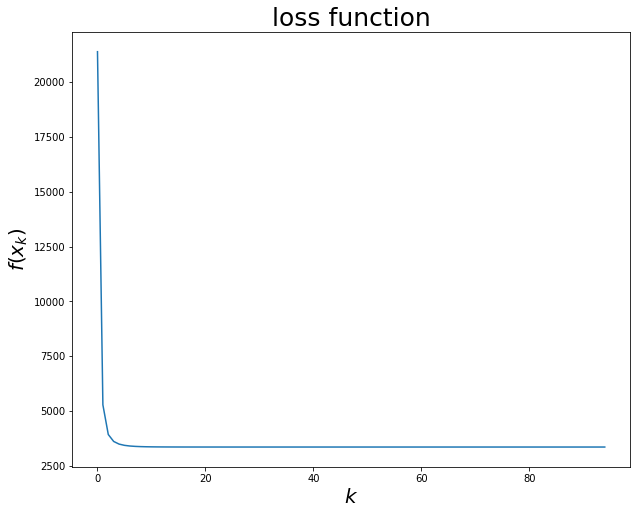

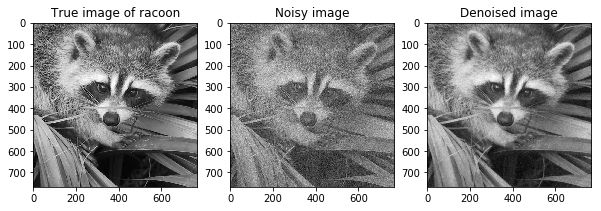

In [185]:
plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(res[1])), res[1])
plt.title('loss function', fontsize = 25)
plt.xlabel('$k$', fontsize = 20)
plt.ylabel('$f(x_k)$',  fontsize = 20)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(enot, cmap='gray'); ax.set_title('True image of racoon')
ax = fig.add_subplot(1, 3, 2)
ax.imshow(y, cmap='gray'); ax.set_title('Noisy image')
ax = fig.add_subplot(1, 3, 3)
ax.imshow(res[0], cmap='gray'); ax.set_title('Denoised image')
plt.show()

### Переменный выбор шага.
$$\eta_k = \frac{1}{\sqrt{k+1}} $$

In [186]:
def gradient_descent_step(y, epsilon , lambd):
    k = 0
    x = y
    F = [f(x, y, lambd)]
    grad = [df(x, y, lambd)]
    while np.linalg.norm(df(x, y, lambd)) > eps:
        k = k + 1
        x = x - (1./((k+1)**0.5)) * df(x, y, lambd)
        F.append(f(x, y, lambd))
        grad.append(df(x, y, lambd))
        print ('k =', k, 
               'grad(f) =', np.linalg.norm(df(x, y, lambd)),
               'f =', F[k])
        if k > 200:
            print ('Too many iterations')
            break
    
    return x, F, grad

In [187]:
lambd = 0.8 
eps = 1e-4 
res_step = gradient_descent_step(y, eps, lambd)

k = 1 grad(f) = 3477.759208507096 f = 567030.4399480146
k = 2 grad(f) = 19445.075077101374 f = 16161276.417890178
k = 3 grad(f) = 98054.5807299876 f = 392418470.4049166
k = 4 grad(f) = 449185.151259563 f = 8017628815.793366
k = 5 grad(f) = 1885191.424979768 f = 138829546197.60364
k = 6 grad(f) = 7307567.442999759 f = 2061459509275.6768
k = 7 grad(f) = 26348558.16968038 f = 26568172100868.863
k = 8 grad(f) = 88903977.85697341 f = 300460163696876.2
k = 9 grad(f) = 282144528.0535459 f = 3010134855964675.5
k = 10 grad(f) = 845821287.236909 f = 2.6935789330876556e+16
k = 11 grad(f) = 2404038747.464899 f = 2.1682326950142586e+17
k = 12 grad(f) = 6498904578.365825 f = 1.5797877238313728e+18
k = 13 grad(f) = 16756212563.019094 f = 1.0475072396285577e+19
k = 14 grad(f) = 41304993969.15869 f = 6.351112835665858e+19
k = 15 grad(f) = 97555543021.9253 f = 3.535993450532597e+20
k = 16 grad(f) = 221183675979.58243 f = 1.8145874439182093e+21
k = 17 grad(f) = 482223173262.4613 f = 8.612244661366234e+21

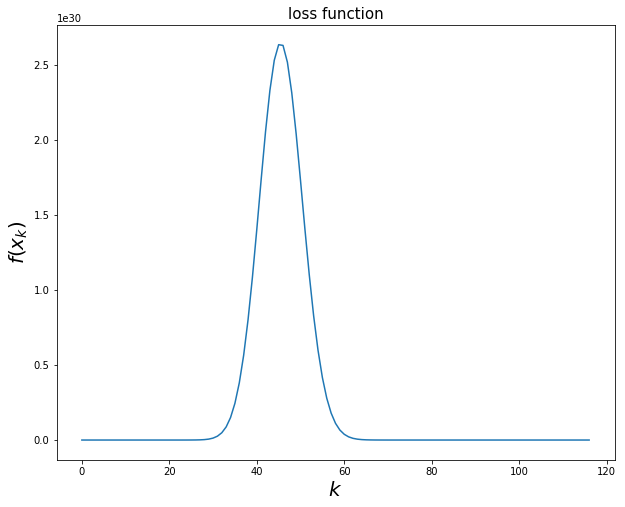

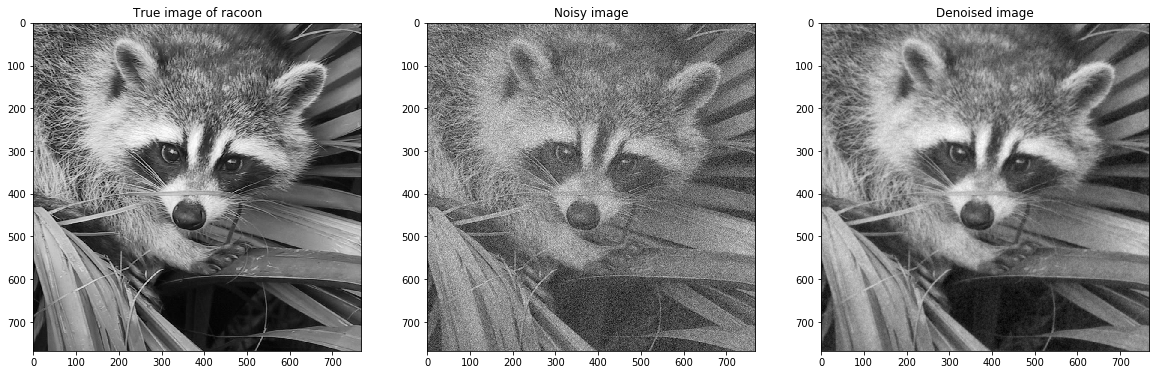

In [188]:
plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(res_step[1])), res_step[1], label='$f(x)$')
plt.title('loss function',  fontsize = 15)
plt.xlabel('$k$', fontsize = 20)
plt.ylabel('$f(x_k)$', fontsize = 20)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(enot, cmap='gray'); ax.set_title('True image of racoon')
ax = fig.add_subplot(1, 3, 2)
ax.imshow(y, cmap='gray'); ax.set_title('Noisy image')
ax = fig.add_subplot(1, 3, 3)
ax.imshow(res_step[0], cmap='gray'); ax.set_title('Denoised image')
plt.show()

### Сравнение результатов.

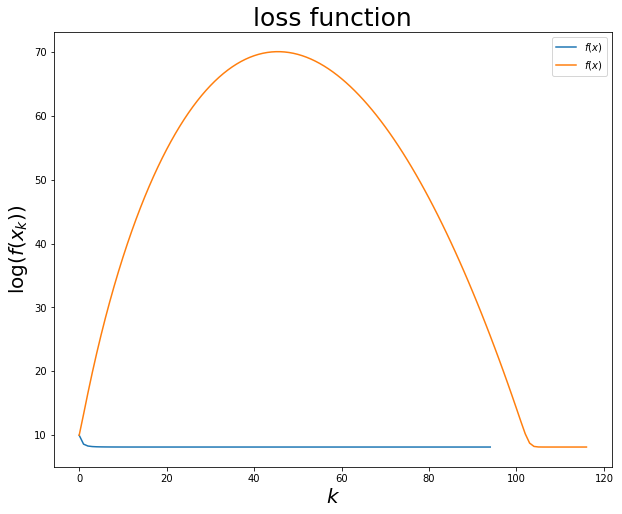

In [189]:
plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(res[1])), np.log(res[1]), label='$f(x)$')
plt.plot(np.arange(len(res_step[1])), np.log(res_step[1]), label='$f(x)$')
#plt.ylim([0, 10000])
plt.title('loss function',  fontsize = 25)
plt.xlabel('$k$',  fontsize = 20)
plt.ylabel('$\log(f(x_k))$',  fontsize = 20)
plt.legend()

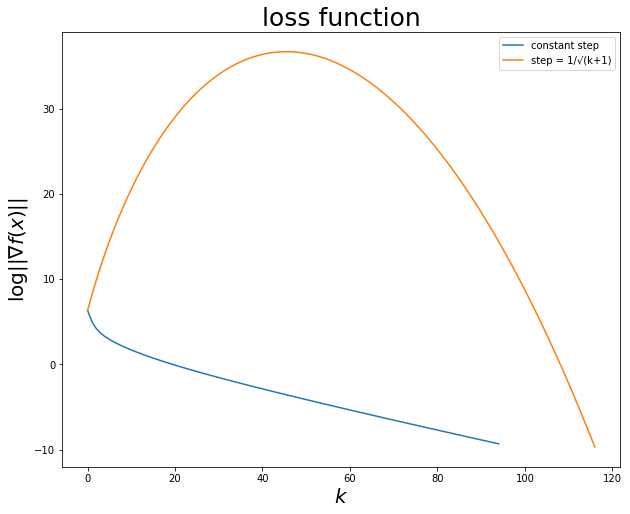

In [190]:
plt.figure(figsize=(10, 8))
gradi = []
for g in res[2]:
    gradi.append(np.linalg.norm(g))
plt.plot(np.arange(len(res[1])), np.log(gradi), label='constant step')
grad_step = []
for g in res_step[2]:
    grad_step.append(np.linalg.norm(g))
plt.plot(np.arange(len(res_step[1])), np.log(grad_step), label='step = 1/√(k+1)')
#plt.ylim([0, 10000])
plt.title('loss function', fontsize = 25)
plt.xlabel('$k$',  fontsize = 20)
plt.ylabel('$\log||∇f(x)||$', fontsize = 20)
plt.legend()

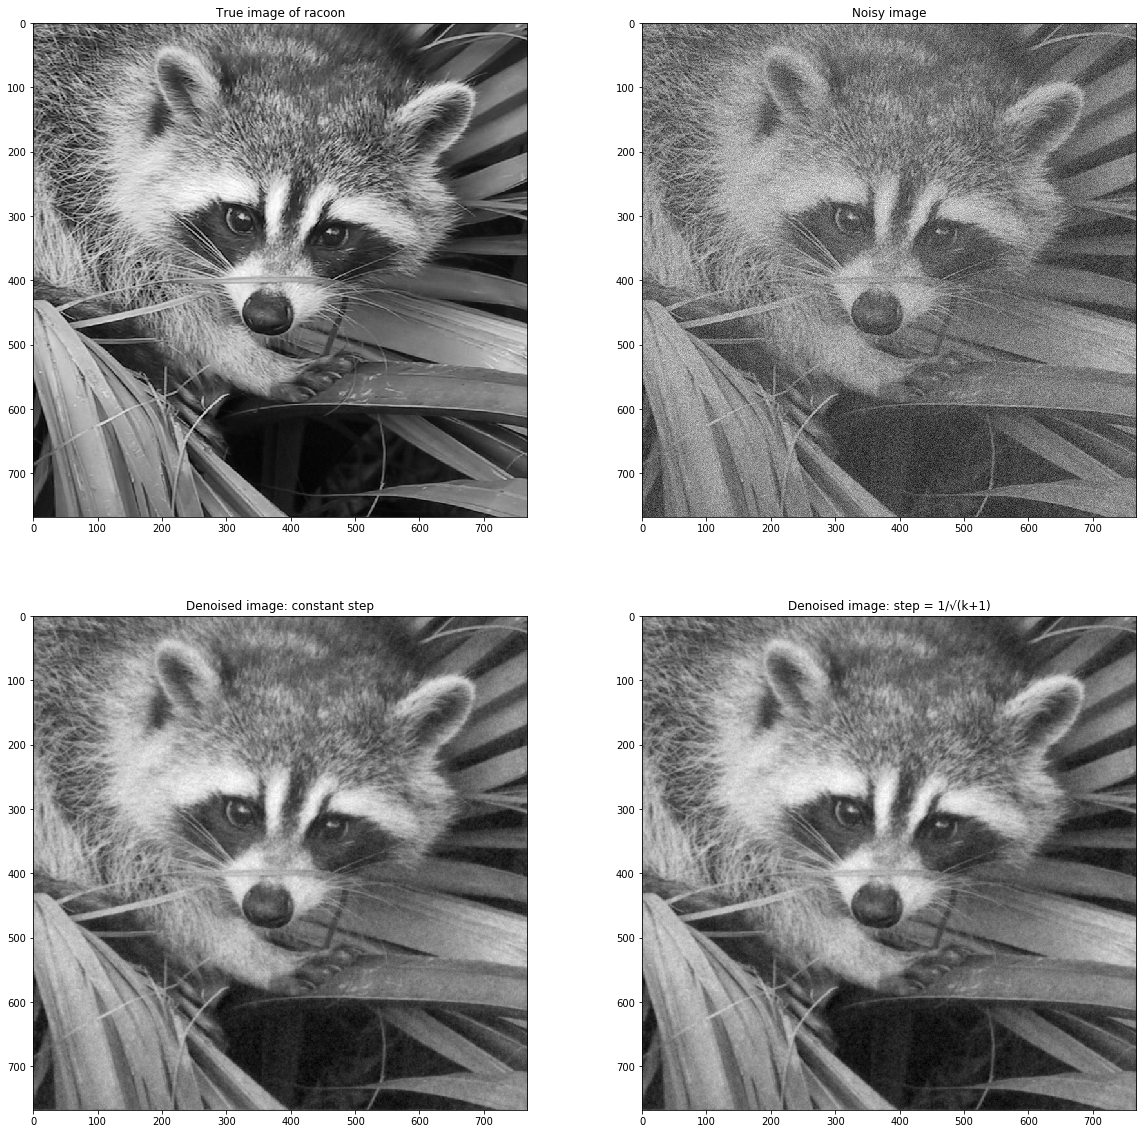

In [191]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 2, 1)
ax.imshow(enot, cmap='gray'); ax.set_title('True image of racoon')
ax = fig.add_subplot(2, 2, 2)
ax.imshow(y, cmap='gray'); ax.set_title('Noisy image')
ax = fig.add_subplot(2, 2, 3)
ax.imshow(res[0], cmap='gray'); ax.set_title('Denoised image: constant step')
ax = fig.add_subplot(2, 2, 4)
ax.imshow(res_step[0], cmap='gray'); ax.set_title('Denoised image: step = 1/√(k+1)')
plt.show()

Теперь проведем эксперимент при $\lambda = 0.4$

In [193]:
lambd = 0.4
eta = 0.1 
eps = 1e-4 
res1 = gradient_descent(y, eta, eps, lambd)
res_step1 = gradient_descent_step(y, eps, lambd)

k = 1 grad(f) = 134.81589125581735 f = 4942.815508751556
k = 2 grad(f) = 74.82011057358204 f = 3545.18139054295
k = 3 grad(f) = 46.17293050270297 f = 3096.346420790262
k = 4 grad(f) = 30.75514467103737 f = 2919.8913811278426
k = 5 grad(f) = 21.677495525035305 f = 2839.6667023469945
k = 6 grad(f) = 15.943365305951831 f = 2799.048388820551
k = 7 grad(f) = 12.107389765491023 f = 2776.7535698601314
k = 8 grad(f) = 9.418286907635261 f = 2763.7521516194147
k = 9 grad(f) = 7.461301423174167 f = 2755.817237066274
k = 10 grad(f) = 5.994638503900983 f = 2750.8042079157713
k = 11 grad(f) = 4.869941584044902 f = 2747.551348621885
k = 12 grad(f) = 3.9918067129879886 f = 2745.395499928454
k = 13 grad(f) = 3.296282171150965 f = 2743.9419768544058
k = 14 grad(f) = 2.7389540129651047 f = 2742.947932594856
k = 15 grad(f) = 2.288052741827791 f = 2742.2598844812037
k = 16 grad(f) = 1.9202930664472078 f = 2741.778677554792
k = 17 grad(f) = 1.618261647061206 f = 2741.4390741562356
k = 18 grad(f) = 1.3687170

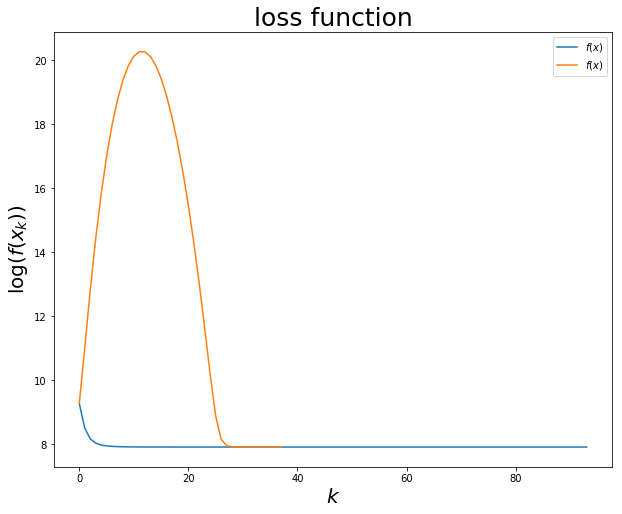

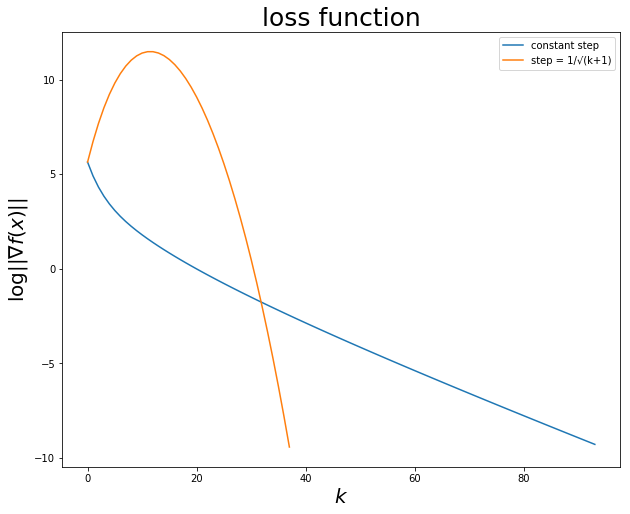

In [194]:
plt.figure(figsize=(10, 8))
plt.plot(np.arange(len(res1[1])), np.log(res1[1]), label='$f(x)$')
plt.plot(np.arange(len(res_step1[1])), np.log(res_step1[1]), label='$f(x)$')
#plt.ylim([0, 10000])
plt.title('loss function',  fontsize = 25)
plt.xlabel('$k$',  fontsize = 20)
plt.ylabel('$\log(f(x_k))$',  fontsize = 20)
plt.legend()

plt.figure(figsize=(10, 8))
gradi = []
for g in res1[2]:
    gradi.append(np.linalg.norm(g))
plt.plot(np.arange(len(res1[1])), np.log(gradi), label='constant step')
grad_step = []
for g in res_step1[2]:
    grad_step.append(np.linalg.norm(g))
plt.plot(np.arange(len(res_step1[1])), np.log(grad_step), label='step = 1/√(k+1)')
plt.title('loss function', fontsize = 25)
plt.xlabel('$k$',  fontsize = 20)
plt.ylabel('$\log||∇f(x)||$', fontsize = 20)
plt.legend()

Можно сделать вывод, что для данной функции потерь выбор метода оптимизации  зависит от $\lambda$.

#### OPTIONAL: Подход богатых студентов (Total Variation Denoising) - делать не нужно (ознакомиться полезно)
[Здесь](http://www.numerical-tours.com/matlab/optim_1_gradient_descent/) можно почитать мануал на [тему](https://en.wikipedia.org/wiki/Total_variation_denoising). 